In [1]:
pip install pandas matplotlib seaborn scikit-learn tensorflow


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score


In [3]:
df = pd.read_csv(r"C:\Works\Part3 - vehicle.csv")

df.iloc[:, :-1] = df.iloc[:, :-1].apply(pd.to_numeric, errors='coerce') 


features = df.iloc[:, :-1]
labels = df["class"]  

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)


print(features_scaled_df.head())


   compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.517302              0.056545      0.272965   
1    -0.325470    -0.624564              0.120112     -0.835442   
2     1.254193     0.843549              1.518571      1.201630   
3    -0.082445    -0.624564             -0.007021     -0.296217   
4    -1.054545    -0.135193             -0.769817      1.081803   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.310206                 0.311542      -0.208038   
1             -0.593962                 0.094079      -0.599893   
2              0.548539                 0.311542       1.148382   
3              0.167705                 0.094079      -0.750606   
4              5.245485                 9.444962      -0.599893   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136580               -0.225160                   0.758332   
1       0.520853               -0.611739            

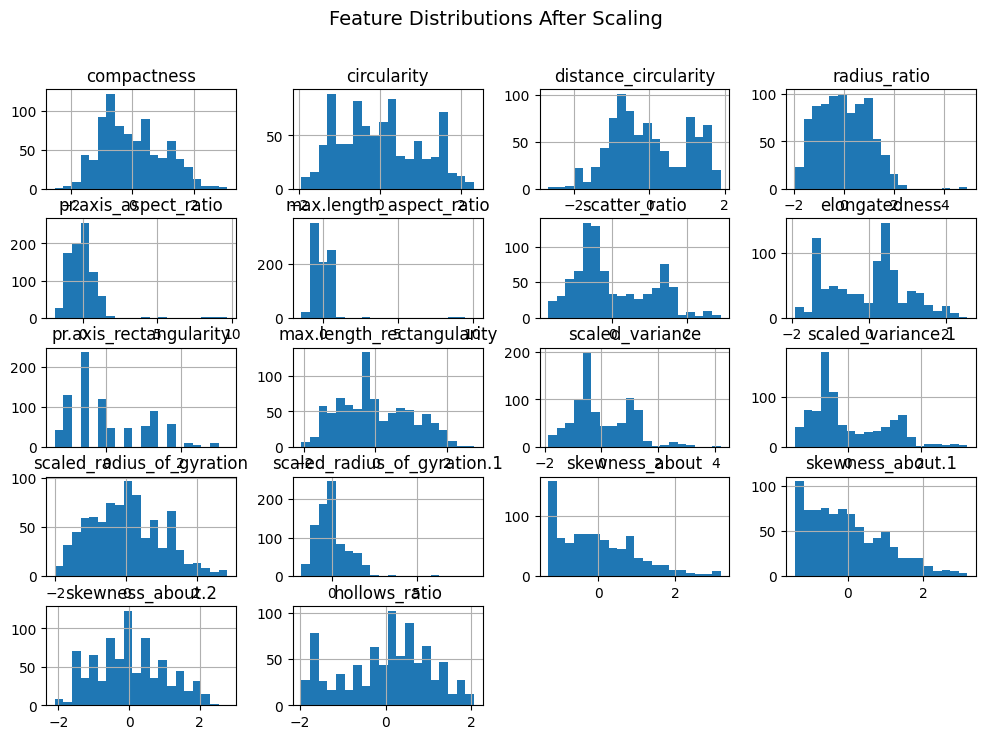

In [4]:
import matplotlib.pyplot as plt

features_scaled_df.hist(figsize=(12, 8), bins=20)
plt.suptitle("Feature Distributions After Scaling", fontsize=14)
plt.show()


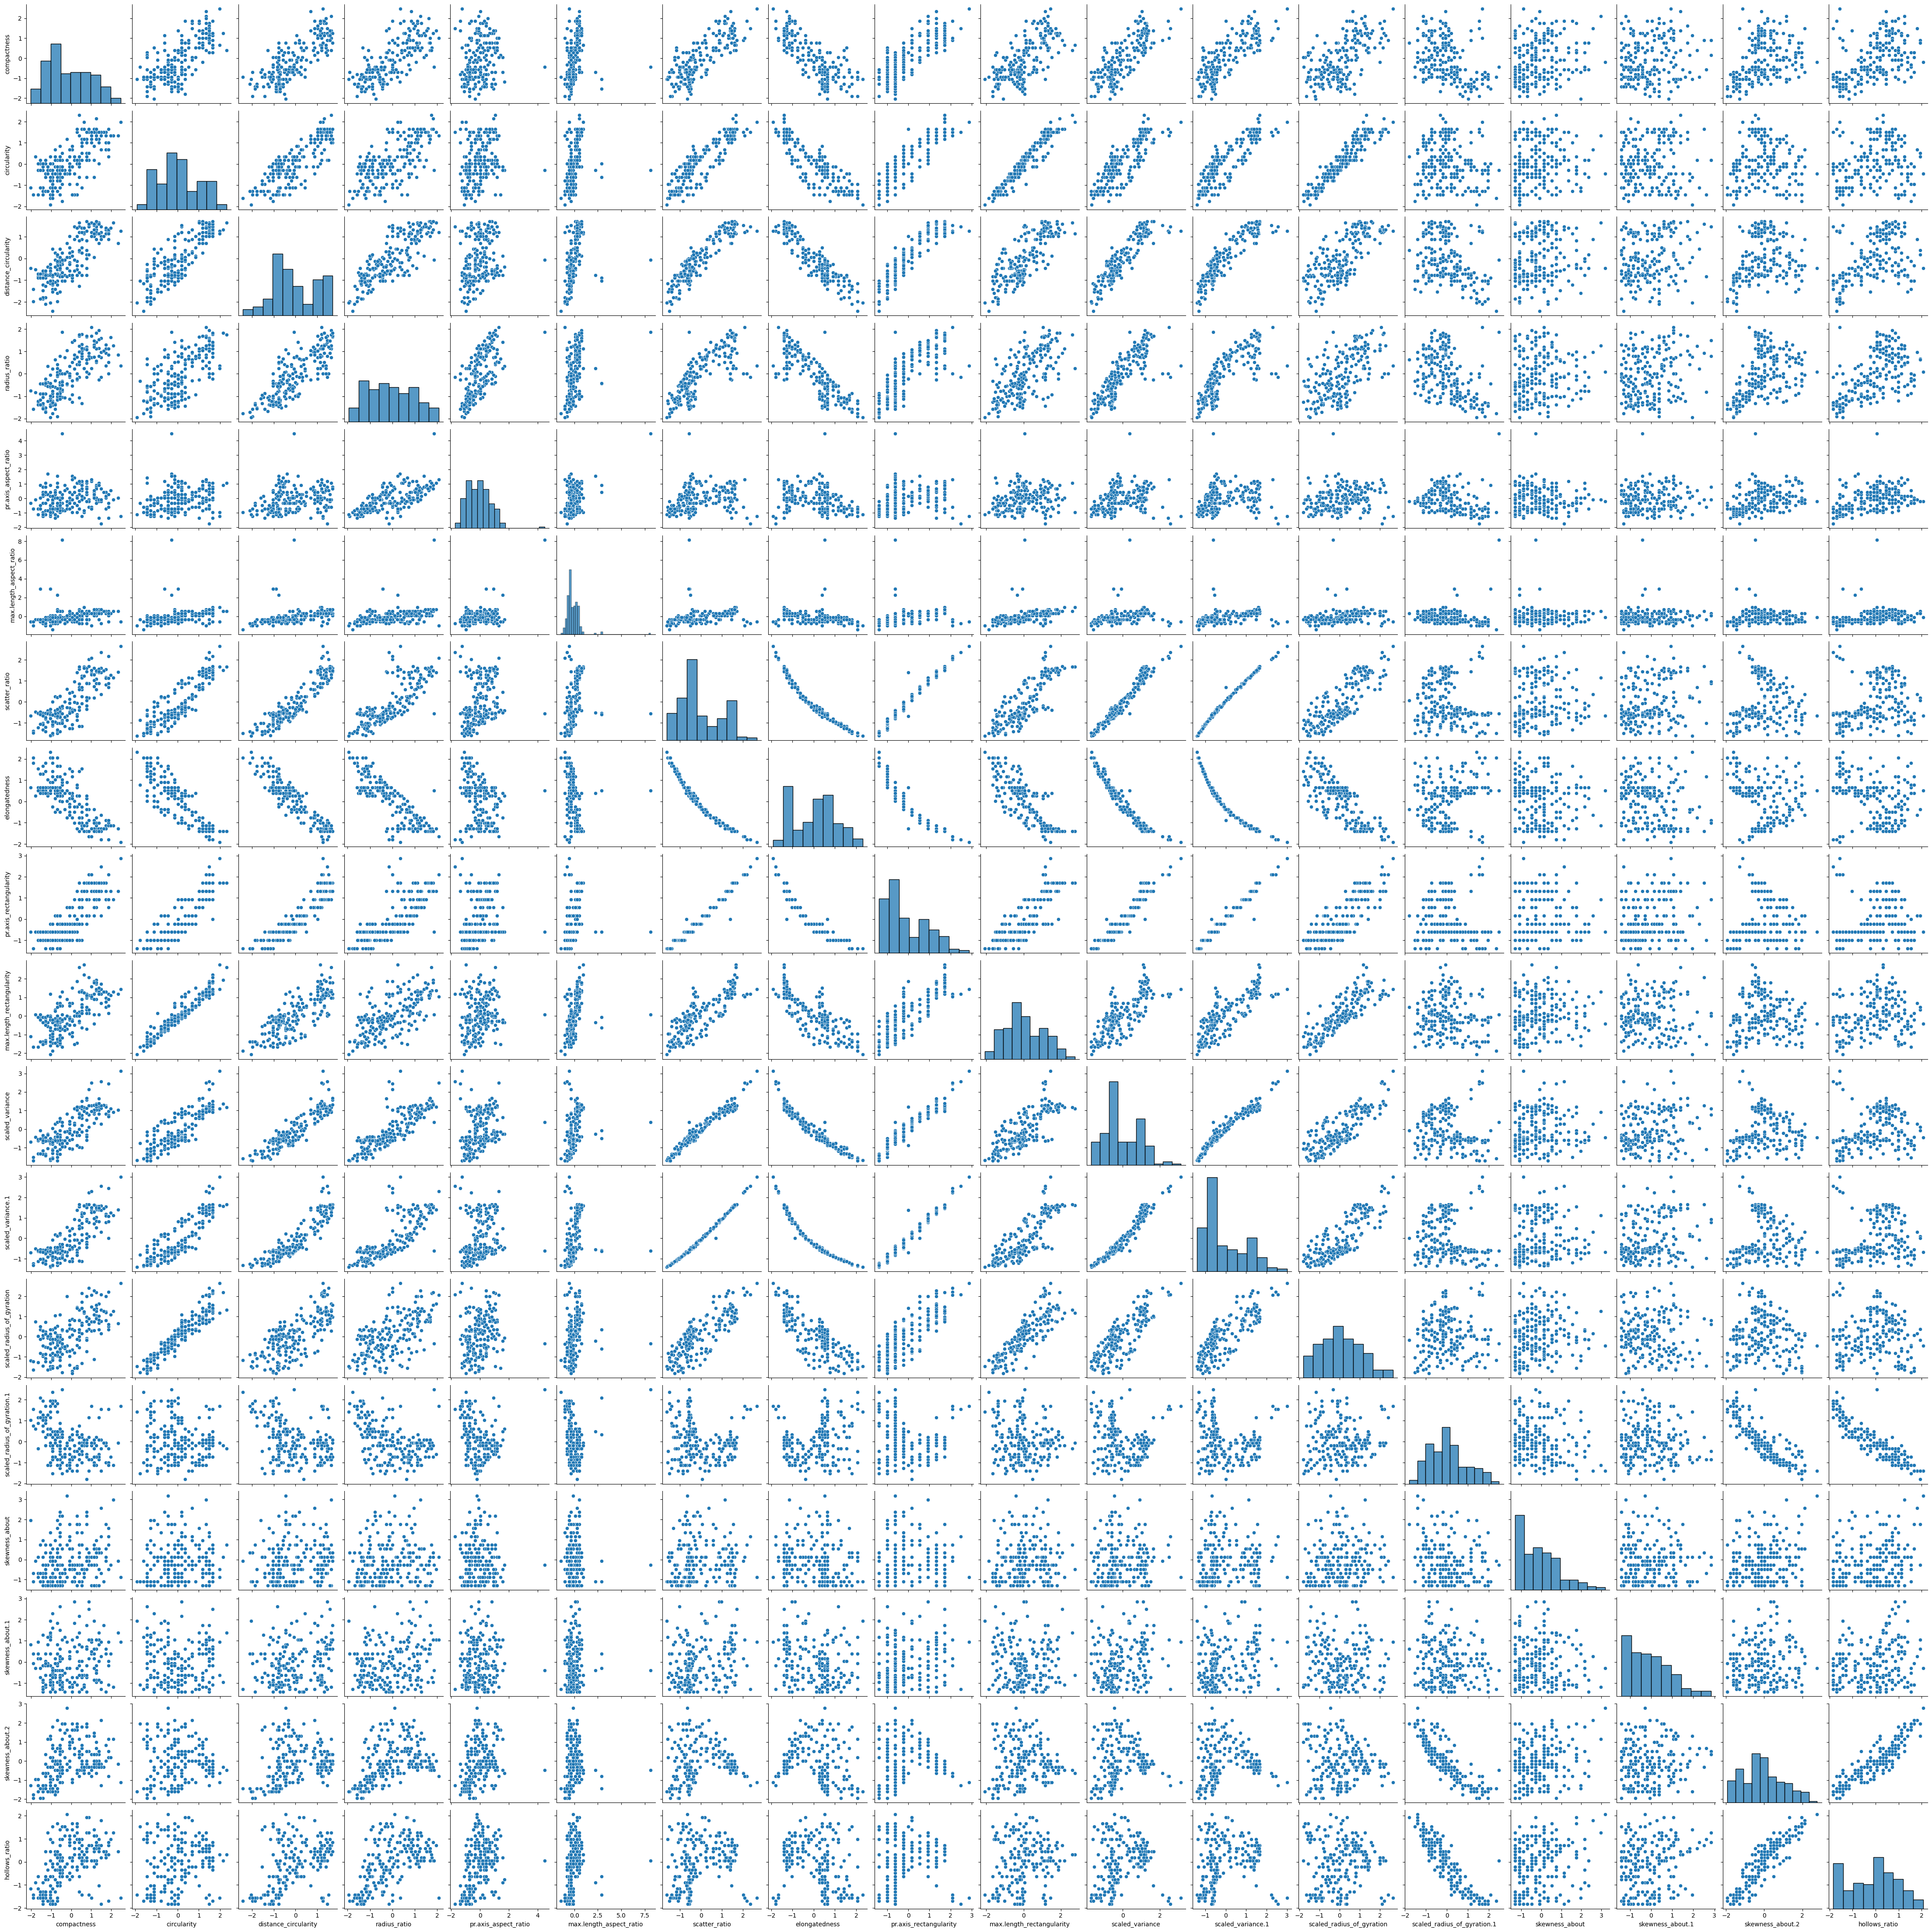

In [5]:
import seaborn as sns

sns.pairplot(features_scaled_df.sample(200))
plt.show()


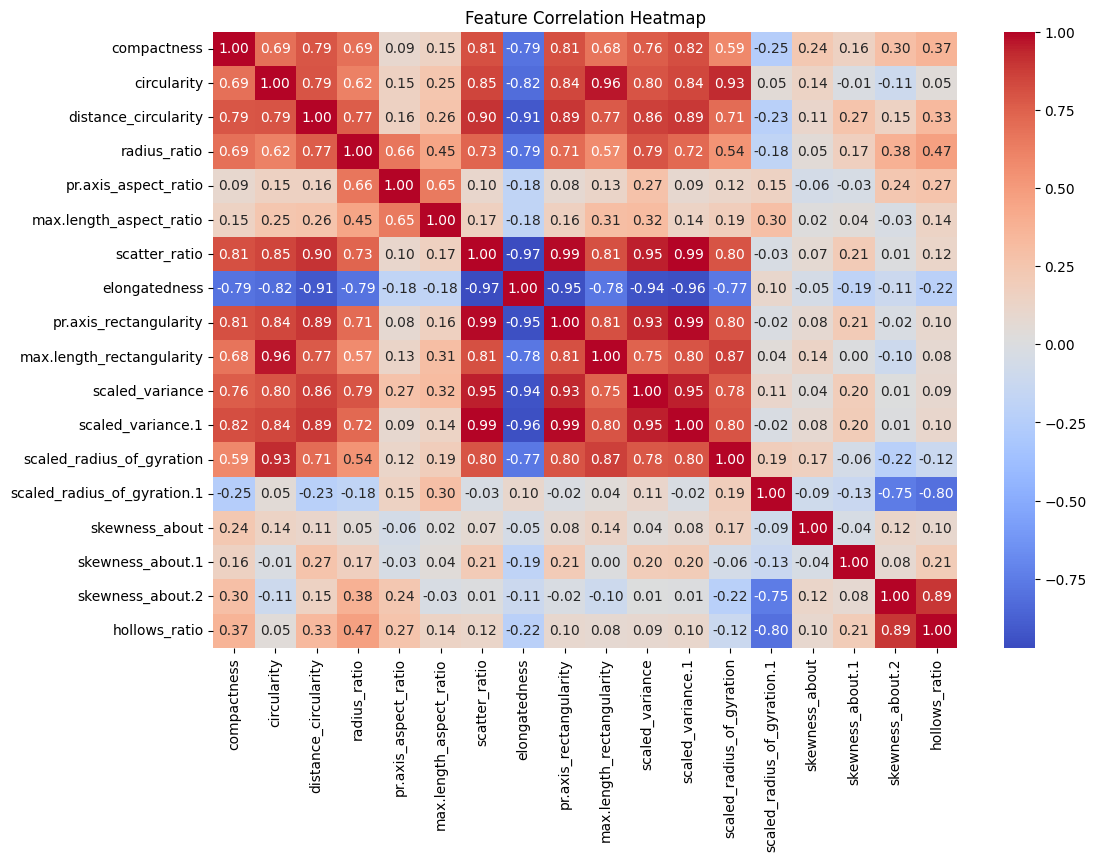

In [6]:
plt.figure(figsize=(12, 8))
sns.heatmap(features_scaled_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


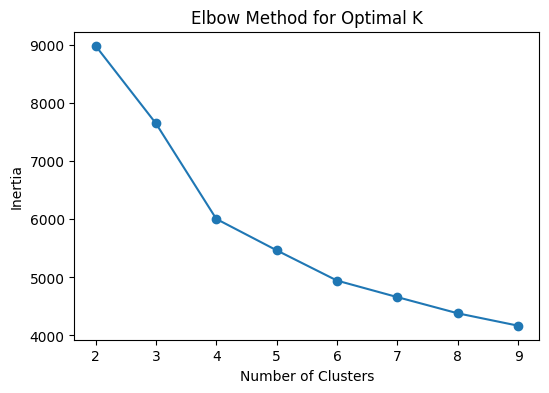

Optimal K: 3
KMeans Silhouette Score: 0.3991


In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
silhouette_scores = []
cluster_range = range(2, 10)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels_kmeans = kmeans.fit_predict(features_scaled_df)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(features_scaled_df, labels_kmeans))

plt.figure(figsize=(6, 4))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

optimal_k = cluster_range[np.argmax(silhouette_scores)]
print(f"Optimal K: {optimal_k}")

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels_kmeans = kmeans.fit_predict(features_scaled_df)

silhouette_kmeans = silhouette_score(features_scaled_df, labels_kmeans)
print(f"KMeans Silhouette Score: {silhouette_kmeans:.4f}")


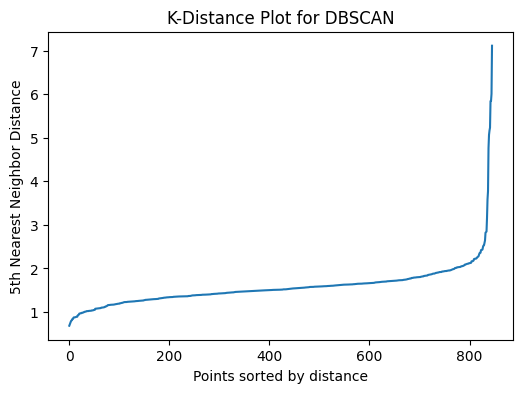

Choose an estimated eps value:  1.7435


DBSCAN Silhouette Score: 0.1857


In [47]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(features_scaled_df)
distances, indices = neighbors_fit.kneighbors(features_scaled_df)
sorted_distances = np.sort(distances[:, 4])

plt.figure(figsize=(6, 4))
plt.plot(sorted_distances)
plt.xlabel("Points sorted by distance")
plt.ylabel("5th Nearest Neighbor Distance")
plt.title("K-Distance Plot for DBSCAN")
plt.show()

eps_value = float(input("Choose an estimated eps value: "))

dbscan = DBSCAN(eps=eps_value, min_samples=5)
labels_dbscan = dbscan.fit_predict(features_scaled_df)

if len(set(labels_dbscan)) > 1:
    silhouette_dbscan = silhouette_score(features_scaled_df, labels_dbscan)
    print(f"DBSCAN Silhouette Score: {silhouette_dbscan:.4f}")
else:
    print("DBSCAN did not find meaningful clusters. Try adjusting eps.")


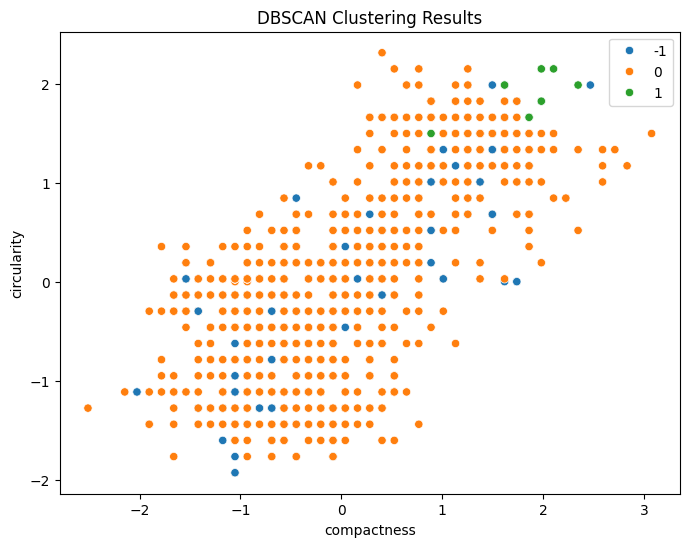

In [48]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=features_scaled_df.iloc[:, 0], y=features_scaled_df.iloc[:, 1], hue=labels_dbscan, palette="tab10")
plt.title("DBSCAN Clustering Results")
plt.show()


In [10]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=optimal_k, random_state=42)
labels_gmm = gmm.fit_predict(features_scaled_df)

silhouette_gmm = silhouette_score(features_scaled_df, labels_gmm)
print(f"GMM Silhouette Score: {silhouette_gmm:.4f}")


GMM Silhouette Score: 0.3678


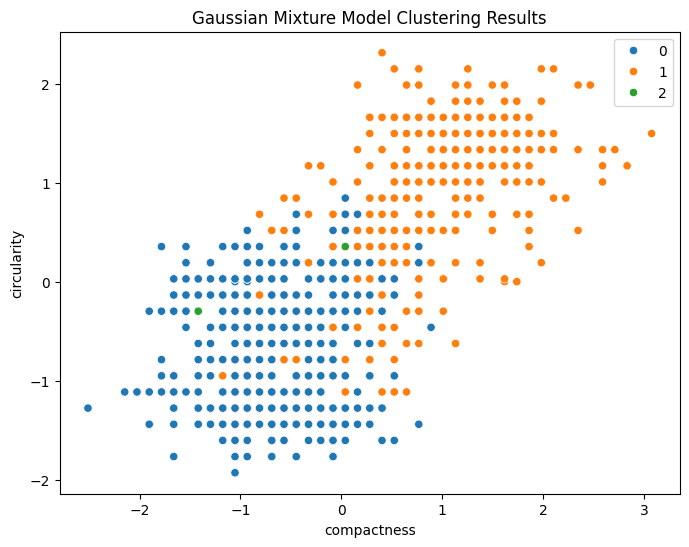

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=features_scaled_df.iloc[:, 0], y=features_scaled_df.iloc[:, 1], hue=labels_gmm, palette="tab10")
plt.title("Gaussian Mixture Model Clustering Results")
plt.show()


In [12]:
print(f"KMeans Silhouette Score: {silhouette_kmeans:.4f}")
print(f"DBSCAN Silhouette Score: {silhouette_dbscan:.4f}")
print(f"GMM Silhouette Score: {silhouette_gmm:.4f}")

scores = {"KMeans": silhouette_kmeans, "DBSCAN": silhouette_dbscan, "GMM": silhouette_gmm}
best_model = max(scores, key=scores.get)
print(f"Best clustering model based on silhouette score: {best_model}")


KMeans Silhouette Score: 0.3991
DBSCAN Silhouette Score: 0.6177
GMM Silhouette Score: 0.3678
Best clustering model based on silhouette score: DBSCAN


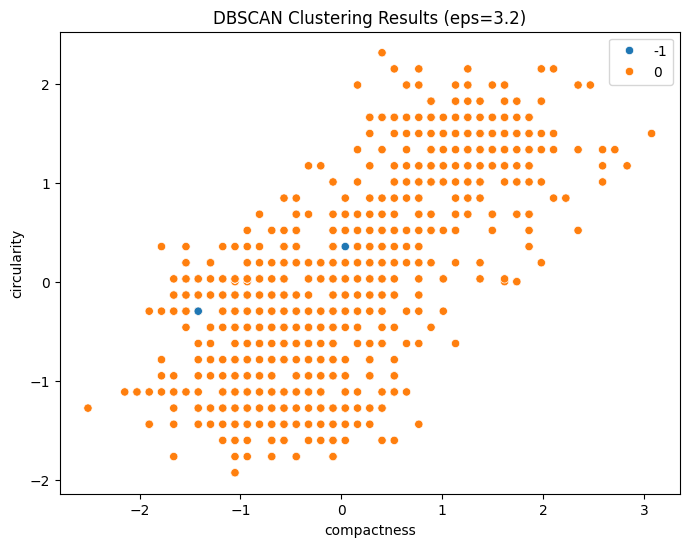

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=features_scaled_df.iloc[:, 0], y=features_scaled_df.iloc[:, 1], hue=labels_dbscan, palette="tab10")
plt.title("DBSCAN Clustering Results (eps=3.2)")
plt.show()


In [14]:
import numpy as np

unique_clusters, counts = np.unique(labels_dbscan, return_counts=True)
cluster_counts = dict(zip(unique_clusters, counts))

print("Cluster Distribution:", cluster_counts)


Cluster Distribution: {np.int64(-1): np.int64(8), np.int64(0): np.int64(838)}


In [15]:
df["Cluster"] = labels_dbscan  # Assign clusters to original dataset
cluster_summary = df.groupby("Cluster")["class"].value_counts()
print(cluster_summary)


Cluster  class
-1       van        6
         bus        2
 0       car      429
         bus      216
         van      193
Name: count, dtype: int64


In [16]:
import pandas as pd

feature_means = features_scaled_df.groupby(df["Cluster"]).mean()
print(feature_means)


         compactness  circularity  distance_circularity  radius_ratio  \
Cluster                                                                 
-1         -0.735574     0.068712             -0.277178      2.972835   
 0          0.007022    -0.000656              0.002646     -0.028380   

         pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
Cluster                                                                 
-1                   6.927499                 8.846940      -0.543375   
 0                  -0.066134                -0.084458       0.005187   

         elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
Cluster                                                                     
-1            0.472819               -0.563417                   0.275809   
 0           -0.004514                0.005379                  -0.002633   

         scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
Cluster                        

In [17]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=optimal_k, linkage="ward")
labels_agg = agg_clustering.fit_predict(features_scaled_df)

print("Agglomerative Clustering Labels:", np.unique(labels_agg, return_counts=True))


Agglomerative Clustering Labels: (array([0, 1, 2]), array([277, 298, 271]))


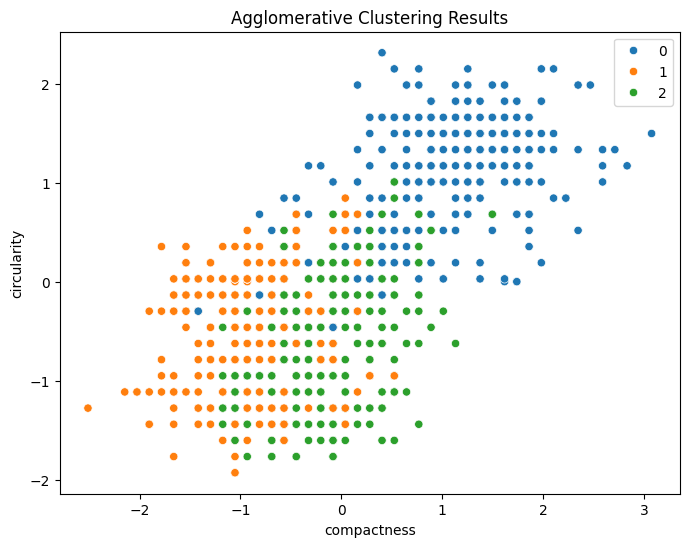

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=features_scaled_df.iloc[:, 0], y=features_scaled_df.iloc[:, 1], hue=labels_agg, palette="tab10")
plt.title("Agglomerative Clustering Results")
plt.show()


In [19]:
pip show tensorflow


Name: tensorflow
Version: 2.19.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\gowth\anaconda3\envs\clustering_env\lib\site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [20]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam

input_dim = features_scaled_df.shape[1]
encoding_dim = 10  # You can adjust this later

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='linear')(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
encoder = Model(inputs=input_layer, outputs=encoded)

autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

history = autoencoder.fit(
    features_scaled_df,
    features_scaled_df,
    epochs=100,
    batch_size=32,
    shuffle=True,
    validation_split=0.2,
    verbose=1
)


Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 1.5153 - val_loss: 1.2046
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2813 - val_loss: 1.0378
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1145 - val_loss: 0.9238
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0269 - val_loss: 0.8299
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9162 - val_loss: 0.7446
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7844 - val_loss: 0.6682
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7083 - val_loss: 0.5990
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6785 - val_loss: 0.5400
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6243 - val_loss: 0.4913
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5409 - val_loss: 0.4528
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5048 - val_loss: 0.4208
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 

In [21]:
encoded_features = encoder.predict(features_scaled_df)

encoded_df = pd.DataFrame(encoded_features, columns=[f"feature_{i+1}" for i in range(encoded_features.shape[1])])
encoded_df.head()


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   0.890348   0.000000   1.279372   0.833045   0.609533   0.130007   
1   0.273537   0.000000   0.000000   0.000000   0.538424   0.318608   
2   0.949892   0.483131   1.567054   2.322194   0.000000   1.531063   
3   1.550693   0.000000   0.291045   0.000000   1.155582   0.355647   
4   0.000000   0.000000  10.289348   4.518852   0.000000   0.000000   

   feature_7  feature_8  feature_9  feature_10  
0   0.127814   0.000000   0.864980    0.084263  
1   0.618302   1.347944   0.000000    1.000630  
2   0.000000   0.000000   3.238577    0.000000  
3   1.087230   1.040762   0.000000    2.280185  
4   4.774104   0.000000   0.000000    0.000000

In [22]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

dbscan_enc = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan_enc = dbscan_enc.fit_predict(encoded_df)

if len(set(labels_dbscan_enc)) > 1:
    silhouette_dbscan_enc = silhouette_score(encoded_df, labels_dbscan_enc)
    print(f"DBSCAN on Encoded Features - Silhouette Score: {silhouette_dbscan_enc:.4f}")
else:
    print("DBSCAN could not find multiple clusters on encoded features.")


DBSCAN on Encoded Features - Silhouette Score: -0.1223


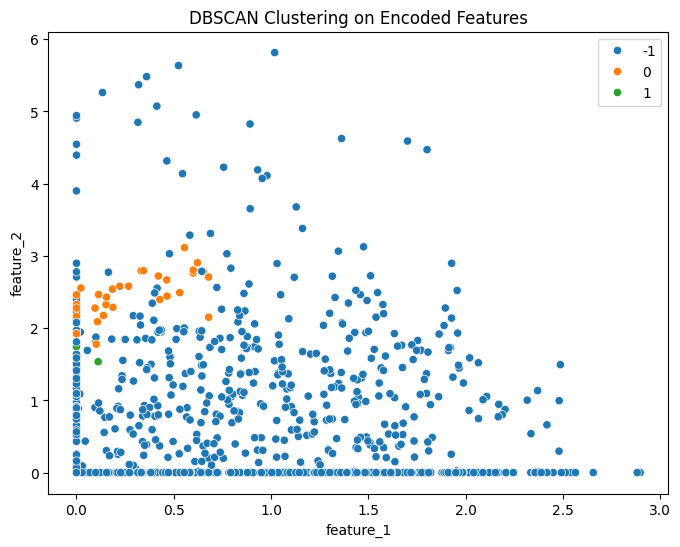

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=encoded_df.iloc[:, 0], y=encoded_df.iloc[:, 1],
    hue=labels_dbscan_enc, palette="tab10"
)
plt.title("DBSCAN Clustering on Encoded Features")
plt.show()


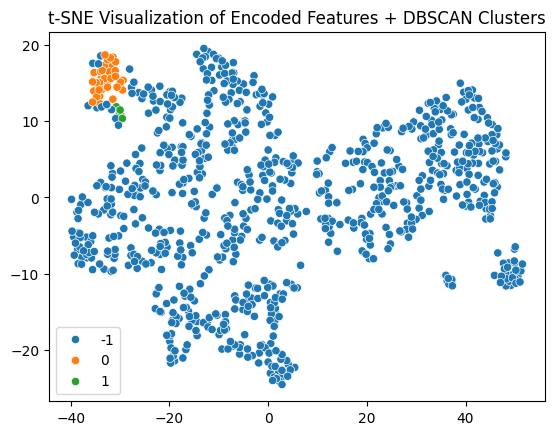

In [24]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
encoded_tsne = tsne.fit_transform(encoded_df)

sns.scatterplot(x=encoded_tsne[:, 0], y=encoded_tsne[:, 1], hue=labels_dbscan_enc, palette='tab10')
plt.title("t-SNE Visualization of Encoded Features + DBSCAN Clusters")
plt.show()


In [50]:
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  Cluster  
0             187.0            197   van        0  
1             189.0            199   van        0  
2             188.0            196   car        0  
3             199.0            207   van        0  
4             180.0            183   bus       -1

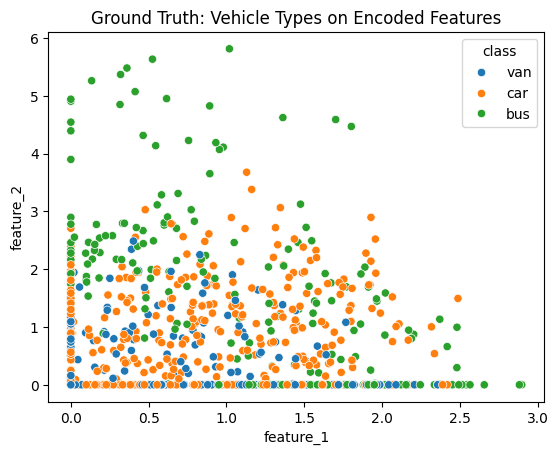

In [51]:
sns.scatterplot(x=encoded_df.iloc[:, 0], y=encoded_df.iloc[:, 1], hue=df['class'])
plt.title("Ground Truth: Vehicle Types on Encoded Features")
plt.show()


In [52]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans_enc = kmeans.fit_predict(encoded_df)

score_kmeans = silhouette_score(encoded_df, labels_kmeans_enc)
print(f"KMeans (Encoded) Silhouette Score: {score_kmeans:.4f}")


KMeans (Encoded) Silhouette Score: 0.4565


In [53]:
pd.crosstab(df['class'], labels_kmeans_enc)


col_0    0    1  2
class             
bus    174   42  2
car    218  211  0
van    193    0  6

In [54]:
from sklearn.cluster import AgglomerativeClustering

agg_model = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_agg = agg_model.fit_predict(encoded_df)  # or features_scaled_df


In [55]:
import pandas as pd

pd.crosstab(df['class'], labels_agg, colnames=['Agg_Cluster'])


Agg_Cluster    0    1  2
class                   
bus          160   56  2
car          204  225  0
van          193    0  6

<Axes: >

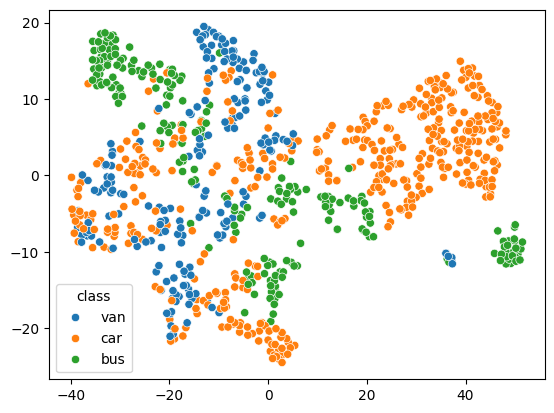

In [56]:
sns.scatterplot(x=encoded_tsne[:, 0], y=encoded_tsne[:, 1], hue=df['class'])


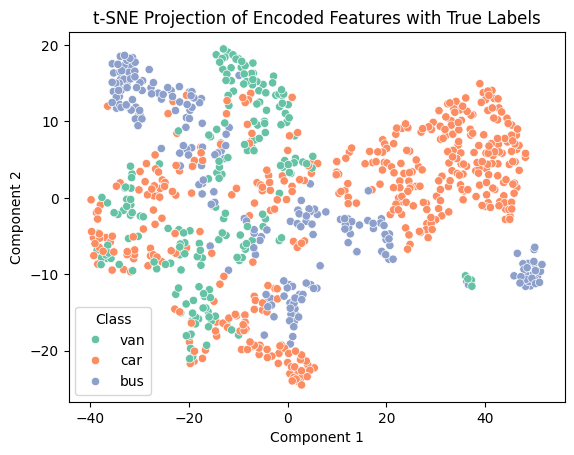

In [57]:
sns.scatterplot(
    x=encoded_tsne[:, 0],
    y=encoded_tsne[:, 1],
    hue=df['class'],  
    palette="Set2"
)
plt.title("t-SNE Projection of Encoded Features with True Labels")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(title="Class")
plt.show()


In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(
    encoded_df, df['class'], test_size=0.3, random_state=42)

clf = LogisticRegression(max_iter=500)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         bus       0.83      0.83      0.83        78
         car       0.85      0.84      0.84       118
         van       0.78      0.79      0.79        58

    accuracy                           0.83       254
   macro avg       0.82      0.82      0.82       254
weighted avg       0.83      0.83      0.83       254

